# RANDOM WALKS - PYTHONIC WAY

Consider a random walk that starts at 0. Each steps has an equal probability of being either +1 or -1. Using Python's random module, we can simulate a random walk over 1000 steps as follows:

<b>Step 1</b>: Set the initial position as 0.<br>
<b>Step 2</b>: Create a list called <b><em>walk</em></b> that stores the position after each iteration.<br>
<b>Step 3</b>: For 1000 iterations, generate the step value randomly - it can be either 1 or -1.<br>
<b>Step 4</b>: The next position is the sum of the current position and the step value. Append this to walk.<br>
<b>Step 5</b>: Plot the result.

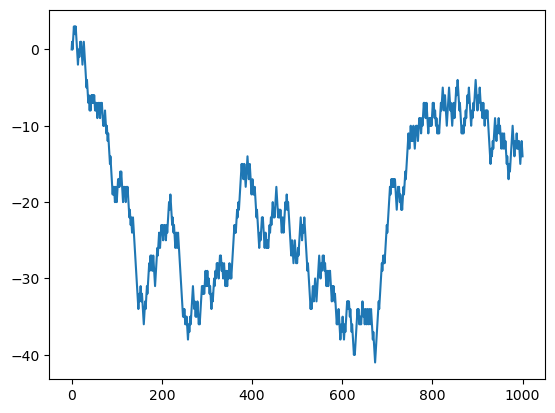

In [7]:
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
plt.plot(walk)

<h1> RANDOM WALKS - THE NUMPY WAY</h1>

The biggest difference between pure Python and NumPy is that the latter does not require the use of for loops. The algorithm to create a random walk using NumPy methods is as follows:

<b>Step 1:</b> Initialise a fresh RNG.<br>
<b>Step 2:</b> Use the <b><em>integers</em></b> method to generate 1000 random integers in the exclusive range (0,1).<br>
<b>Step 3:</b> Use the <b><em>where</em></b> method to change all instances of 0 to 1 and 1 to -1.<br>
<b>Step 4:</b> Calculate the cumulative sum of the positions after each iteration using <b><em>cumsum</em></b>.<br>
<b>Step 5:</b> Plot the result.

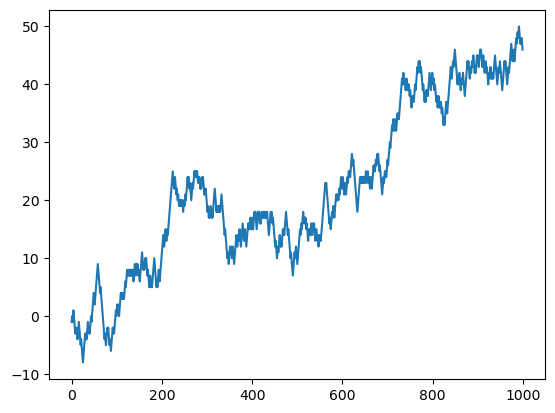

In [22]:
import numpy as np
import matplotlib.pyplot as plt
nsteps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0,2,nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()
plt.plot(walk)

<h1>STATISTICAL EXPLORATION OF THE RANDOM WALK</h1>

Using summary statistics, we can extract more information about the random walk. For 1000 steps, the summary statistics are shown below. Interestingly, the mean position increases as the number of steps in the walk increases, instead of approaching zero.<br>
<b>Minimum Position</b>: -8<br>
<b>Maximum Position</b>: 50<br>
<b>Mean Position</b>: 21.79<br>

Another interesting statistic that we can calculate is the <em>first crossing time</em> -- the step at which the random walk first reaches a particular value. Say, we want to calculate how long it took to reach a position that is 15 steps away from the origin in either direction. By looking at the graph, we can roughly calculate this value to be slightly above 200. Testing the same using <b><em>argmax</em></b>, we find that we were correct -- the first time the position is at least 15 steps from the origin is indeed 208. Let's break the statement down:

<h5>np.abs(walk>=15).argmax()</h5><br>
<ul><li>First, we're deriving a Boolean-valued array from the original array. If the value in the original array is greater than or equal to fifteen, the corresponding element in the new array will be True, else False.</li><li><b><em>argmax</em></b> returns the first index of the maximum value in a Boolean array, which is one. That is, it returns the first index for which position >= 15 is True.</li></ul>

In [24]:
print("Minimum position in the walk: ", walk.min())
print("Maximum position in the walk: ", walk.max())
print("Mean position in the walk: ", walk.mean())
np.abs(walk>=15).argmax()

Minimum position in the walk:  -8
Maximum position in the walk:  50
Mean position in the walk:  21.79


208

<h1>SIMULATING MULTIPLE RANDOM WALKS</h1>

By tweaking the code for a single walk slightly, we can simulate multiple random walks. Let's say that we want to simulate 5000 random walks. The algorithm for that is:

<b>Step 1:</b> Initialise <b><em>nwalks</em></b> to 5000 and <b><em>nsteps</em></b> to 1000.<br>
<b>Step 2:</b> Use the <b><em>integers</em></b> method with size=(nwalks, nsteps) to generate an ndarray with the dimensions 5000x1000, i.e., create a simulation of each walks populated by 0s and 1s.<br>
<b>Step 3:</b> Use the <b><em>where</em></b> method to change all instances of 0 to 1 and 1 to -1.<br>
<b>Step 4:</b> Calculate the cumulative sum of the positions after each iteration using <b><em>cumsum</em></b>. Note that you must specify axis=1, as we're adding all the columns of each row.<br>
<b>Step 5:</b> Plot the result.

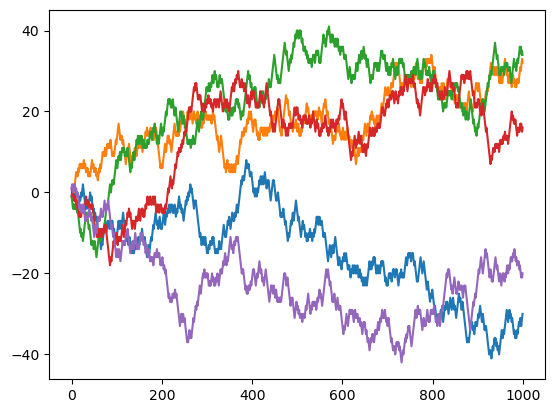

In [34]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws == 0, 1, -1)
walks = steps.cumsum(axis=1)
for i in range(5):  # Plot the first 5 walks
    plt.plot(walks[i])
plt.show()

<h1>STATISTICAL EXPLORATION OF MULTIPLE WALKS</h1>

As we did for the single walk, we can extract more information about multiple walks using summary staistics. For  5000 walks, each of 1000 steps, the summary statistics are shown below.<br>
<b>Minimum Position</b>: -121<br>
<b>Maximum Position</b>: 121<br>
<b>Mean Position</b>: -0.28006<br>
<b><em>Food for thought</em></b>: An interesting observation is that when we plotted a single walk, no matter how much we increased the number of steps, the mean value did not tend to zero. However, when we keep that number of steps constant at 1000, but increase the number of walks to 5000, the minimum and maximum position are exactly the same (121), and the mean (-0.28006) is very close to zero.

This time, let's say we want to calculate how long it took to reach a position that is 30 steps away from the origin in either direction. Whereas we could have inferred this graphically for a single walk, this is not possible with 5000 walks. In fact, this event probably won't even occur in some of the walks. So the logical first step is to filter out such walks and only deal with the walks where 30 was reached. This is done using <b><em>any</em></b> with axis=1. The expression <b><em>(np.abs(walks) >= 30)</em></b> returns a 5000x1000 ndarray, where each element is a Boolean value which is True if the corresponding element of walks has an absolute value greater than or equal to 30.

Using <b><em>sum</em></b>, we find that we that in 3343 of the 5000 walks, 30 was crossed. These walks correspond to those elements in the hits30 array where the value is True. We can access just these walks using the expression <b><em>nps.abs(walks[hits30])</em></b>. By adding a comparison operator >= 30 and using <b><em>argmax</em></b>, we can find the iteration in which the mark 30 was crossed in each of those 3343 walks. The summary statistics are shown below.<br>
<b>Minimum crossing time</b>: 55<br>
<b>Maximum crossing time</b>: 999<br>
<b>Mean crossing time</b>: 505.87526174095126<br>



In [62]:
print("Minimum position in the walk: ", walks.min())
print("Maximum position in the walk: ", walks.max())
print("Mean position in the walk: ", walks.mean())
hits30 = (np.abs(walks) >= 30).any(axis=1)
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
print("Minimum crossing time: ", crossing_times.min())
print("Maximum crossing time: ", crossing_times.max())
print("Mean crossing time: ", crossing_times.mean())

Minimum position in the walk:  -121
Maximum position in the walk:  121
Mean position in the walk:  -0.28006
Minimum crossing time:  55
Maximum crossing time:  999
Mean crossing time:  505.87526174095126
